### Thesis Research Notebook <br>
### LDR Data Augmentation for Convolutional Neural Network Construction 

In [159]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [160]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [161]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]


print(x_train.shape)
print(y_train.shape)

(45000, 32, 32, 3)
(45000, 1)


In [162]:
print(x_train[0,0,0])
print(y_train[1])

[127 110 104]
[8]


In [163]:
pretrained_base = tf.keras.applications.vgg19.VGG19(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=[32,32,3], pooling=None, classes=100,
    classifier_activation='softmax'
)


set_trainable = False

In [164]:
# Model Creation 
model = tf.keras.Sequential([
    # First Convolutional Block
    # 32 filter layers, Kernel Size of 3 x 3. Relu activation.  Add zeroes all around so the image doesn't change size, Padding='same'.

    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', input_shape=[32, 32, 3]),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),
    
    #Classifer Head
    layers.Flatten(),
    layers.Dense(units=2048, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=100, activation="softmax"),
    
    

])




In [165]:
opt = tf.optimizers.Adam(learning_rate=0.0001)

In [166]:
model.compile(
    optimizer=opt,
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=30,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/30
1407/1407 [==============================] - 19s 13ms/step - loss: 5.0092 - accuracy: 0.0332 - val_loss: 3.9823 - val_accuracy: 0.1000
Epoch 2/30
1407/1407 [==============================] - 18s 13ms/step - loss: 4.3293 - accuracy: 0.0699 - val_loss: 3.6507 - val_accuracy: 0.1494
Epoch 3/30
1407/1407 [==============================] - 17s 12ms/step - loss: 3.9636 - accuracy: 0.1059 - val_loss: 3.4245 - val_accuracy: 0.1800
Epoch 4/30
1407/1407 [==============================] - 17s 12ms/step - loss: 3.6789 - accuracy: 0.1385 - val_loss: 3.2340 - val_accuracy: 0.2064
Epoch 5/30
1407/1407 [==============================] - 18s 13ms/step - loss: 3.4295 - accuracy: 0.1771 - val_loss: 3.0900 - val_accuracy: 0.2402
Epoch 6/30
1407/1407 [==============================] - 18s 13ms/step - loss: 3.1957 - accuracy: 0.2146 - val_loss: 2.8824 - val_accuracy: 0.2700
Epoch 7/30
1407/1407 [==============================] - 18s 13ms/step - loss: 2.9869 - accuracy: 0.2485 - val_loss: 2.7588 -

KeyboardInterrupt: 

In [ ]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 4ms/step - loss: 3.8467 - accuracy: 0.3636
test loss, test acc: [3.8467421531677246, 0.3635999858379364]


KeyError: 'val_accuracy'

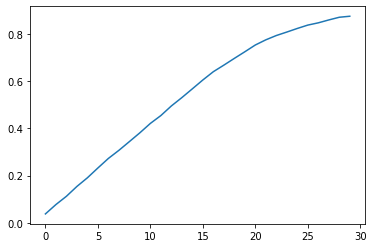

In [ ]:
# Plot the accuracy and loss after 30 Epochs


caption = 'Base: 32 -> 512, BatchNorm, MaxPool' '\n' 'Head: 2048 -> 256, Batch Normalization, Dropout 0.4' '\n'  

# Train/Test Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Custom_0_30')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(-.5,-.5, caption)
plt.show()

# Train/Test Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custom_0_100')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(-.5,-3.5, caption)
plt.show()